# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

---
# Ejercicio 🌮🥤

## 📍 Objetivo
Resolver la prueba técnica para el puesto de Data Analyst de la startup [ifood](https://www.ifood.com.br/) de Brasil.
<br>Esta startup se dedica al servicio de delivery de comida similar a Pedidos Ya, Rappi y Uber Eats.

## 📍 Contexto

### La empresa

Considere una empresa bien establecida que opera en el sector minorista de alimentos. Actualmente tienen alrededor
varios cientos de miles de clientes registrados y sirven a casi un millón de consumidores al año.
Venden productos de 5 categorías principales: vinos, productos cárnicos raros, frutas exóticas, especialmente
Pescados preparados y productos dulces. Estos se pueden dividir en productos premium y productos regulares. 

Los clientes pueden ordenar y adquirir productos a través de 3 canales de venta: tiendas físicas, catálogos y
el sitio web de la empresa. A nivel mundial, la compañía tuvo ingresos sólidos y un resultado final saludable en el
últimos 3 años, pero las perspectivas de crecimiento de ganancias para los próximos 3 años no son prometedoras ... 

**Por esta razón, se están considerando varias iniciativas estratégicas para revertir esta situación. Una es mejorar la realización de actividades de marketing, con un enfoque especial en las campañas de marketing.**


### El Departamento de Marketing

El departamento de marketing fue presionado para gastar su presupuesto anual de manera más inteligente. La CMO
percibe la importancia de tener un enfoque más cuantitativo a la hora de tomar decisiones, por lo que **se contrató a un pequeño equipo de científicos de datos con un objetivo claro en mente: construir una solución que apoye las iniciativas de marketing directo.**
<br>Deseablemente, el éxito de estas actividades demostrará el área de oportunidad y también deberan convencer a los más escépticos dentro de la empresa.


### El objetivo del equipo 

Es construir un análisis para abordar el mayor beneficio para la próxima campaña de marketing, programada para el próximo mes. La nueva campaña, la sexta, tiene como objetivo vender a una nueva base de datos de clientes. 

**Para construir el análisis, se desarrollo una campaña piloto que involucró 2.240 clientes. Los clientes fueron seleccionados al azar y contactados por teléfono con respecto a la adquisición del gadget. Durante los meses siguientes, los clientes que compraron el oferta fueron debidamente etiquetados.**

El coste total de la campaña de muestra fue de 6.720MU y los ingresos generado por los clientes que aceptaron la oferta fue de 3.674MU. A nivel mundial, la campaña tuvo un beneficio de -3.046MU. La tasa de éxito de la campaña fue del 15%.


## 📍 Consideraciones

- Repliquen este notebook para la resolución del ejercicio.
- Consideren las etapas: 1) Cargamos los datos, 2) Preparación de la data, 3) Clasificación, 4) Regresión y 5) Guardar un modelo.

**Son libres de decidir:**
- Cómo preparar y acondicionar el dataset.
- Pueden agregar y eliminar columnas del dataset.
- Decidir parámetros para ajustar en los modelos de clasificación y regresión.


## 📍 Consigna

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`. 
- Guarden el modelo de clasificación Randon forest como `rf.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.

---

# Regresion Model

In [1]:
import numpy as np
import pandas as pd

import funpymodeling

from pprint import pprint

In [2]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
df_data = pd.read_csv("data/new_marketing_campaign.csv", sep=',')

In [4]:
print(df_data.columns)
print(df_data.shape)

Index(['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
       'AcceptedAnyCmp', 'HasChildren', 'Age', 'ClientDays', 'AmountSpend',
       'NumPurchases', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Generation_BabyBoomer', 'Generation_Millennials',
       'Generation_Postguerra', 'Generation_X', 'Generation_Z',
       'NewMaritalStatus_Couple', 'NewMaritalStatus_Divorced',
       'NewMaritalStatus_Other', 'NewMaritalStatus_Single',
       'NewMaritalStatus_Widow'],
      dtype='object')
(2198, 26)


In [5]:
df_data

,Income,Recency,NumWebVisitsMonth,Complain,Response,AcceptedAnyCmp,HasChildren,Age,ClientDays,AmountSpend,NumPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Generation_BabyBoomer,Generation_Millennials,Generation_Postguerra,Generation_X,Generation_Z,NewMaritalStatus_Couple,NewMaritalStatus_Divorced,NewMaritalStatus_Other,NewMaritalStatus_Single,NewMaritalStatus_Widow
0,58138.0,58,7,0,1,0,0,66,3885,1617,25,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,46344.0,38,5,0,0,0,1,69,3335,27,6,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,71613.0,26,4,0,0,0,0,58,3534,776,21,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,26646.0,26,6,0,0,0,1,39,3361,53,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,58293.0,94,5,0,0,0,1,42,3383,422,19,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,61223.0,46,5,0,0,0,1,56,3603,1341,18,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2194,64014.0,56,7,0,0,1,1,77,3241,444,22,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2195,56981.0,91,6,0,0,1,0,42,3377,1241,19,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2196,69245.0,8,3,0,0,0,1,67,3378,843,23,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


Dropeamos la variable `Response`.

In [6]:
labels = ['Response']
df_data = df_data.drop(labels=labels, axis=1)

In [7]:
funpymodeling.status(df_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Income,0,0.0,0,0.000000,1957,float64
1,Recency,0,0.0,28,0.012739,100,int64
2,NumWebVisitsMonth,0,0.0,10,0.004550,16,int64
3,Complain,0,0.0,2179,0.991356,2,int64
4,AcceptedAnyCmp,0,0.0,1748,0.795268,2,int64
5,HasChildren,0,0.0,617,0.280710,2,int64
6,Age,0,0.0,0,0.000000,52,int64
7,ClientDays,0,0.0,0,0.000000,662,int64
8,AmountSpend,0,0.0,0,0.000000,1038,int64
9,NumPurchases,0,0.0,4,0.001820,39,int64


<AxesSubplot:>

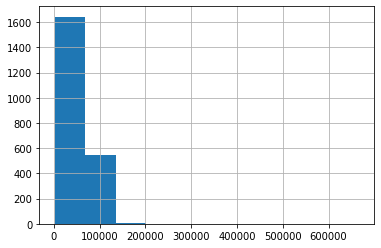

In [8]:
df_data['Income'].hist(bins=10)

Preparamos los datos que seran usados para el entrenamiento.

In [9]:
data_x = df_data.drop('Income', axis=1)
data_y = df_data['Income']

In [10]:
data_x = data_x.values
data_y = data_y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Spliteamos el dataset
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.3,
)

Creación del modelo de regresion lineal `LinearRegression`

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Creamos el modelo
lr_model = LinearRegression()

In [15]:
%%time

lr_model.fit(x_train, y_train)

CPU times: user 4.2 ms, sys: 2.88 ms, total: 7.08 ms
Wall time: 4.48 ms


LinearRegression()

In [16]:
# En training
pred_tr = lr_model.predict(x_train)

In [17]:
# En testing
pred_ts = lr_model.predict(x_test)

In [18]:
pred_tr

array([70586.82102485, 55449.31213456, 78318.64251657, ...,
       47119.7313606 , 63679.47171341, 55690.71565134])

In [19]:
pred_ts

array([28138.27852722, 74975.71640077, 29973.98652912, 58576.45480802,
       73495.67282443, 49686.89523543,  6145.7174849 , 42514.0432298 ,
       31572.19127717, 38021.01958165, 51815.35188775, 77685.08131937,
       61994.97837332, 38466.64789288, 61927.95757265, 76713.06705689,
       54871.48154992, 32251.26452439, 71941.15167866, 49412.92790167,
       48862.7238232 , 54044.73889211, 45156.80330808, 61905.1306307 ,
       42022.91303234, 27414.20985577, 38781.829051  , 31371.0299163 ,
       43465.68569386, 36567.36412804, 44971.91435105, 48312.723987  ,
       58710.70028689, 48009.55826874, 45544.8091729 , 44915.54748286,
       49304.83254654, 59614.50644084, 30287.16927706, 37128.33052972,
       71326.04019589, 31146.17238685, 47033.6527125 , 47358.90669786,
       38066.14192504, 36135.46129595, 42863.23446905, 30203.94198418,
       30568.65475006, 30741.22627797, 15298.48470844, 53100.49765565,
       47574.39240948, 81297.1912939 , 27494.212468  , 36381.38295048,
      

Calculamos algunas metricas sobre el modelo entrenado

In [20]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [21]:
train_metrics = {
    'MAE': mean_absolute_error(y_train, pred_tr),
    'MAPE': mean_absolute_percentage_error(y_train, pred_tr),
    #'MSE': mean_squared_error(y_train, pred_tr),
    #'RMSE': np.sqrt(mean_squared_error(y_train, pred_tr)),
}

pprint(train_metrics)

{'MAE': 7362.089539745677, 'MAPE': 0.236075625323214}


In [22]:
test_metrics = {
    'MAE': mean_absolute_error(y_test, pred_ts),
    'MAPE': mean_absolute_percentage_error(y_test, pred_ts),
    #'MSE': mean_squared_error(y_test, pred_ts),
    #'RMSE': np.sqrt(mean_squared_error(y_test, pred_ts)),
}

pprint(test_metrics)

{'MAE': 8165.04853225087, 'MAPE': 0.19101311370204524}


In [23]:
df_metrics_lr = pd.DataFrame([
    train_metrics,
    test_metrics,
], index=['train', 'test'])

display(df_metrics_lr)

,MAE,MAPE
train,7362.089540,0.236076
test,8165.048532,0.191013


In [24]:
df_metrics_lr = df_metrics_lr.T
display(df_metrics_lr)

,train,test
MAE,7362.089540,8165.048532
MAPE,0.236076,0.191013


Creación del modelo `RandomForestRegressor` con hypertuning (usando grid search)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf_model = RandomForestRegressor()

In [27]:
param_grid = {
    'n_estimators': [10, 20, 100, 500, 5000],
    'max_features': [50, 100],
    # 'bootstrap': [False, True],
    # 'max_depth': [50, 500],
    # 'min_samples_leaf': [3, 50],
    # 'min_samples_split': [10, 50],
}

In [28]:
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5, 
    verbose=1
)

In [29]:
%%time

rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 3min 34s, sys: 2.33 s, total: 3min 36s
Wall time: 3min 38s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [50, 100],
                         'n_estimators': [10, 20, 100, 500, 5000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [30]:
rf_grid

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [50, 100],
                         'n_estimators': [10, 20, 100, 500, 5000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [31]:
rf_grid.best_estimator_

RandomForestRegressor(max_features=100, n_estimators=500)

In [32]:
# En training
pred_tr = rf_grid.predict(x_train)

In [33]:
# En testing
pred_ts = rf_grid.predict(x_test)

In [34]:
pred_tr

array([69008.004, 59407.59 , 79637.478, ..., 50728.78 , 64484.624,
       59004.778])

In [35]:
pred_ts

array([ 28274.75 ,  72150.994,  38529.258,  53004.964,  78807.526,
        68170.986,  37403.312,  48410.948,  30989.814,  43293.736,
        50878.656,  78089.304,  64266.094,  30375.198,  69894.18 ,
        69755.904,  55981.952,  36100.426,  65762.214,  59285.89 ,
        54818.47 ,  57366.578,  49768.788,  60389.176,  48966.474,
        25375.258,  31257.952,  31378.076,  48435.076,  31925.416,
        41060.748,  56082.392,  61470.066,  49654.128,  49556.002,
        42861.802,  49106.48 ,  59642.034,  34227.79 ,  32630.068,
        73361.504,  21408.968,  50853.914,  44560.49 ,  37177.858,
        29231.088,  53143.028,  19996.068,  27125.04 ,  24080.84 ,
        22254.8  ,  54790.34 ,  52709.656,  77962.464,  29870.562,
        35925.084,  65132.02 ,  39031.49 ,  33416.714,  53127.222,
        67186.746,  39086.538,  81860.426,  34194.888,  66765.434,
        54366.376,  31716.064,  44220.256,  63107.554,  88889.766,
        57965.406,  57446.348,  78089.304,  58989.988,  33709.

Calculamos las metricas

In [38]:
train_metrics = {
    'MAE': mean_absolute_error(y_train, pred_tr),
    'MAPE': mean_absolute_percentage_error(y_train, pred_tr),
    #'MSE': mean_squared_error(y_train, pred_tr),
    #'RMSE': np.sqrt(mean_squared_error(y_train, pred_tr)),
}

pprint(train_metrics)

{'MAE': 2328.682700910273, 'MAPE': 0.08345799308140699}


In [39]:
test_metrics = {
    'MAE': mean_absolute_error(y_test, pred_ts),
    'MAPE': mean_absolute_percentage_error(y_test, pred_ts),
    #'MSE': mean_squared_error(y_test, pred_ts),
    #'RMSE': np.sqrt(y_test(y_train, pred_ts)),
}

pprint(test_metrics)

{'MAE': 7163.789393939394, 'MAPE': 0.1824806962609339}


In [40]:
df_metrics_rf = pd.DataFrame([
    train_metrics,
    test_metrics,
], index=['train', 'test'])

display(df_metrics_rf)

,MAE,MAPE
train,2328.682701,0.083458
test,7163.789394,0.182481


In [41]:
df_metrics_rf = df_metrics_rf.T
display(df_metrics_rf)

,train,test
MAE,2328.682701,7163.789394
MAPE,0.083458,0.182481


In [42]:
pd.concat(
    [
        pd.DataFrame(rf_grid.cv_results_["params"]),
        pd.DataFrame(rf_grid.cv_results_["mean_test_score"],  columns=["neg_mean_absolute_error"])
    ],
    axis=1
).sort_values('neg_mean_absolute_error', ascending=False)

,max_features,n_estimators,neg_mean_absolute_error
8,100,500,-6584.690098
4,50,5000,-6590.978605
3,50,500,-6591.469318
9,100,5000,-6600.994107
2,50,100,-6611.402283
7,100,100,-6611.833413
6,100,20,-6767.200185
1,50,20,-6848.125054
5,100,10,-6878.957126
0,50,10,-6933.308295


In [43]:
# neg_mean_absolute_error
rf_grid.score(x_train, y_train)

-2328.682700910273

In [44]:
# neg_mean_absolute_error
rf_grid.score(x_test, y_test)

-7163.789393939394

In [45]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

Gráficamos la Curva de Error.
- **Linea Gris**: Lo que nos gustaría que fuera
- **Linea Negra**: El ajuste de regresión, de la regresión misma

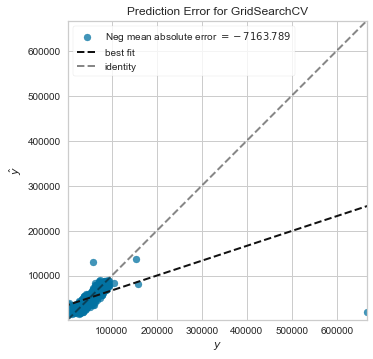

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
# Grafico de la Curva de Error
vis_pred_err = PredictionError(rf_grid)

vis_pred_err.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_pred_err.score(x_test, y_test)  # Calculamos las métricas para test
vis_pred_err.show()                 # Visualizamos!

Gráfico de Residuos

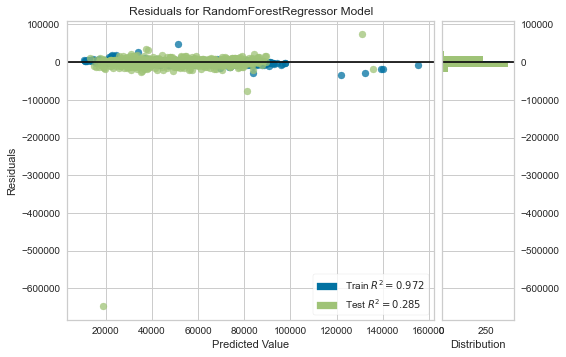

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
vis_res = ResidualsPlot(rf_grid.best_estimator_)

# Copy-paste de la doc oficial: 
vis_res.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res.score(x_test, y_test)  # Calculamos las métricas para test
vis_res.show()                 # Visualizamos!